# OCEAN Token Sentiment Analysis Challenge

> The objective of this notebook is to explore the dataset available in the challenge proposed by the Ocean Protocol in order to understand the correlation between OCEAN prices and tweets with "$OCEAN" tag.


> Creator: Néstor Campos (https://www.linkedin.com/in/nescampos/)


> Date: 2023-06-13


> Challenge: https://desights.ai/challenge/9

## Extracting and opening the dataset


> A copy of the dataset was downloaded to make it easy to read at all times. This exploration uses Google Colab and Drive, but can be applied in any context with local files.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ocean_prices = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/OCEAN/OCEAN token price dataset.csv')
ocean_tweets = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/OCEAN/$OCEAN tweets dataset.csv')

# 1. Calculate the correlation between the price of OCEAN and the number of tweets containing "$OCEAN". What conclusions can be drawn from this correlation?


We group the tweets by date and obtain their total day by day, to later join it with the price dataframe and verify the correlation.

In [4]:

# Group tweets by day and count the number of tweets per day
tweets_per_day = ocean_tweets.groupby('date').size().reset_index(name='tweet_count')

# Merge DataFrames based on "Date" column
merged_df = pd.merge(tweets_per_day, ocean_prices, left_on='date', right_on="Date")

# Calculate the correlation between the columns of interest
correlation = merged_df['tweet_count'].corr(merged_df['Close'])

print("The correlation between the number of tweets per day and 'Close' is:", correlation)

The correlation between the number of tweets per day and 'Close' is: 0.444738829441712


In this specific case, a correlation of **0.44** indicates that there is a positive trend between the number of tweets per day and the OCEAN "Close" value. This means that as the number of tweets per day increases, it is likely that the value of OCEAN will also tend to increase, although not necessarily in a linear fashion. However, a correlation of 0.44 does not imply a perfect relationship, as there are other factors and variables that can influence the price of OCEAN.

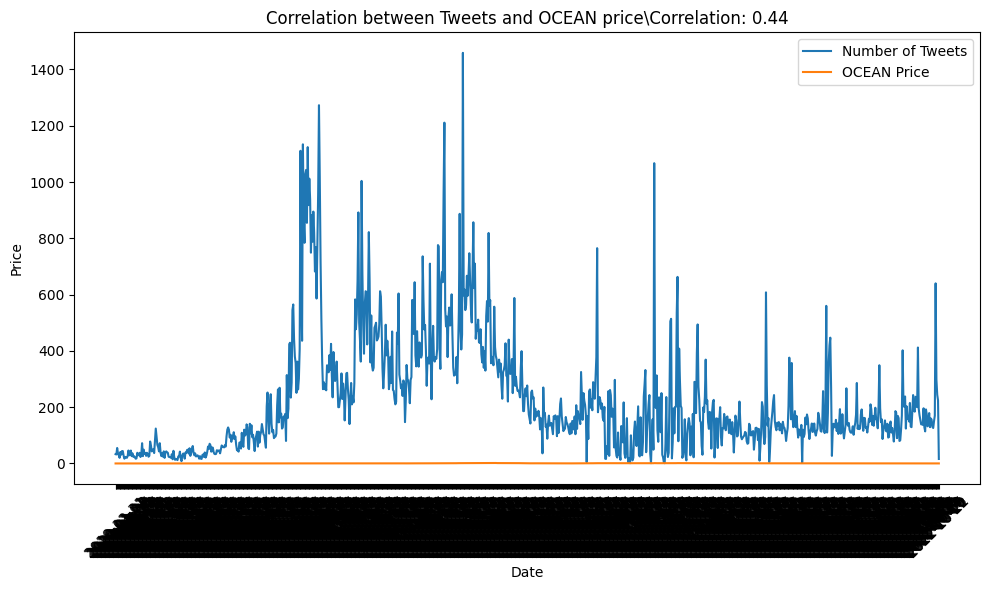

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Date'], merged_df['tweet_count'], label='Number of Tweets')
plt.plot(merged_df['Date'], merged_df['Close'], label='OCEAN Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'Correlation between Tweets and OCEAN price\Correlation: {correlation:.2f}')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Determine the correlation between the price of OCEAN and the number of likes received by tweets containing "$OCEAN". What insights can be derived from this correlation?

In this case, we apply a similar case to the previous one, but considering the sum of all the likes per day of all the tweets.

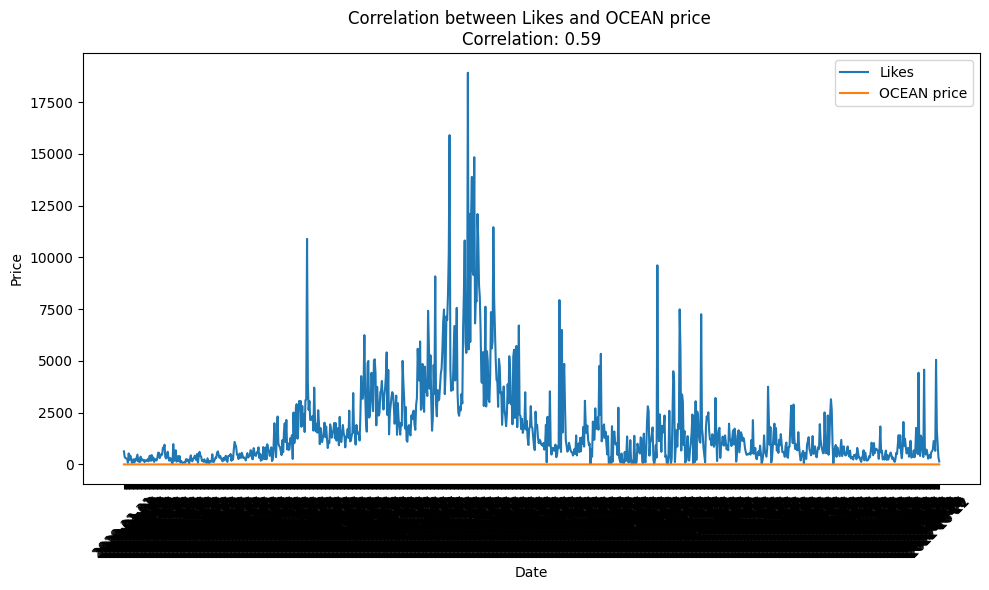

In [7]:
# Group tweet likes by day and calculate the sum of likes per day
likes_per_day = ocean_tweets.groupby('date')['likes_count'].sum().reset_index(name='total_likes')

# Merge the DataFrames based on the "Date" column
merged_df = pd.merge(likes_per_day, ocean_prices, left_on='date', right_on="Date")

# Calculate the correlation between the columns of interest
correlation = merged_df['total_likes'].corr(merged_df['Close'])

# Create the correlation graph
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Date'], merged_df['total_likes'], label='Likes')
plt.plot(merged_df['Date'], merged_df['Close'], label='OCEAN price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'Correlation between Likes and OCEAN price \nCorrelation: {correlation:.2f}')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

A correlation of **0.59** indicates a moderate to strong positive correlation between the total number of tweet likes per day and the OCEAN "Close" price, suggesting that they may be related to some extent, but other factors and variables need to be considered to get a more complete picture.

# 3. Establish the correlation between the price of OCEAN and the number of retweets generated by tweets containing "$OCEAN". What conclusions can be made from this correlation?

Now we do the same, but with the number of retweets.

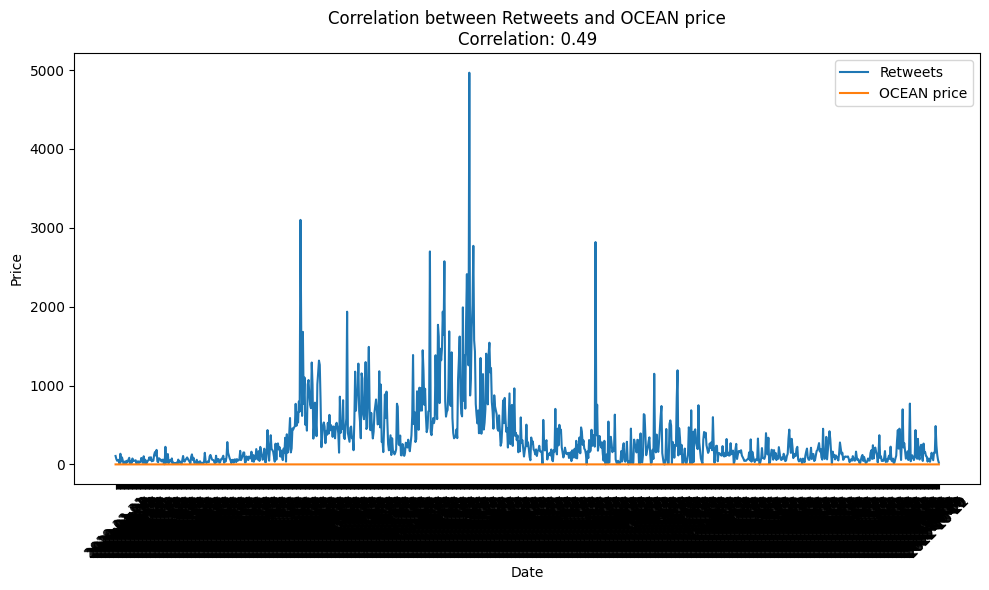

In [8]:
retweets_per_day = ocean_tweets.groupby('date')['retweets_count'].sum().reset_index(name='total_retweets')

# Fusionar los DataFrames en base a la columna "Date"
merged_df = pd.merge(retweets_per_day, ocean_prices, left_on='date', right_on="Date")

# Calcular la correlación entre las columnas de interés
correlation = merged_df['total_retweets'].corr(merged_df['Close'])

# Crear el gráfico de correlación
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Date'], merged_df['total_retweets'], label='Retweets')
plt.plot(merged_df['Date'], merged_df['Close'], label='OCEAN price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'Correlation between Retweets and OCEAN price\nCorrelation: {correlation:.2f}')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In this case, the correlation is **0.49**, which is less than the number of likes, but greater than the number of tweets, which "may" imply that interaction with tweets (both likes and retweets) is more correlated with the price than the mere fact of publishing a text on the social network.
This correction is moderate, which could indicate that it could be strong if we evaluate a longer time window.

# 4. Assess the correlation between the price of OCEAN and the number of individuals tweeting with the cashtag "$OCEAN". What conclusions can be drawn from this correlation?


Now we do it based on the number of different people who tweet with the cashtag "$OCEAN".

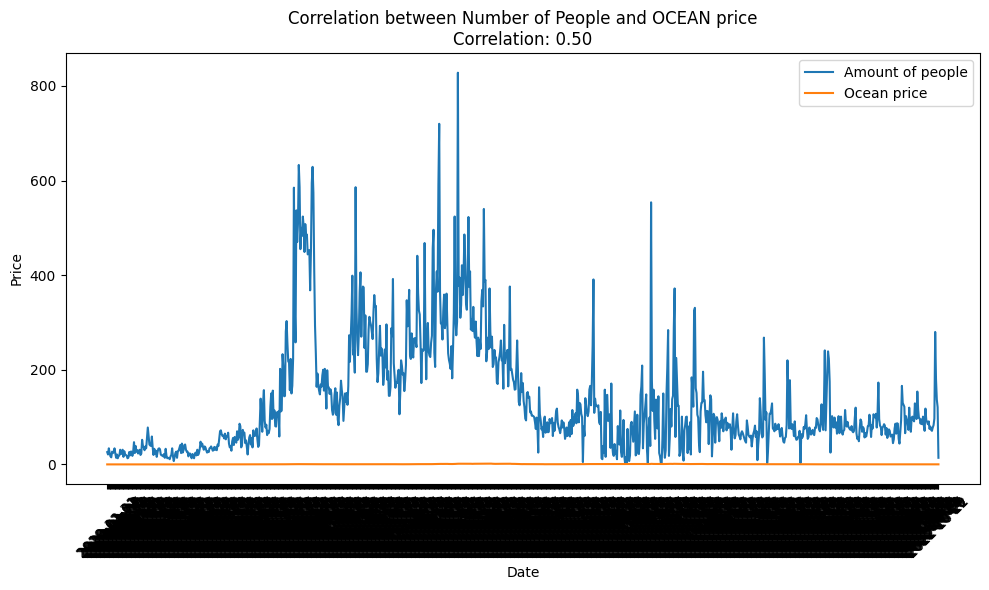

In [9]:
# Get the number of unique people who tweeted per day
unique_users_per_day = ocean_tweets.groupby('date')['user_id'].nunique().reset_index(name='unique_users')

# Merge DataFrames based on "Date" column
merged_df = pd.merge(unique_users_per_day, ocean_prices, left_on='date', right_on="Date")

# Calculate the correlation between the columns of interest
correlation = merged_df['unique_users'].corr(merged_df['Close'])

# Create the correlation graph
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Date'], merged_df['unique_users'], label='Amount of people')
plt.plot(merged_df['Date'], merged_df['Close'], label='Ocean price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'Correlation between Number of People and OCEAN price\nCorrelation: {correlation:.2f}')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

A correlation of **0.5** implies that there is a direct relationship between the number of people tweeting about the OCEAN and its price. This means that as the number of people tweeting about "$OCEAN" increases, its price is more likely to increase as well, and vice versa.

# 5. Analyze the impact of influential tweets on the price of the OCEAN token. What conclusions can be drawn from this analysis?

In this case, we arbitrarily set what an influential tweet is. Therefore, we have generated 3 possibilities.

- Tweets with 100 likes, 30 retweets and 30 replies.
- Tweets with 200 likes, 50 retweets and 50 replies.
- Tweets with 500 likes, 50 retweets and 50 replies.

For each, we calculate the correlation for each attribute under these most influential tweets, but the average instead of sum (to check if they are really influential).

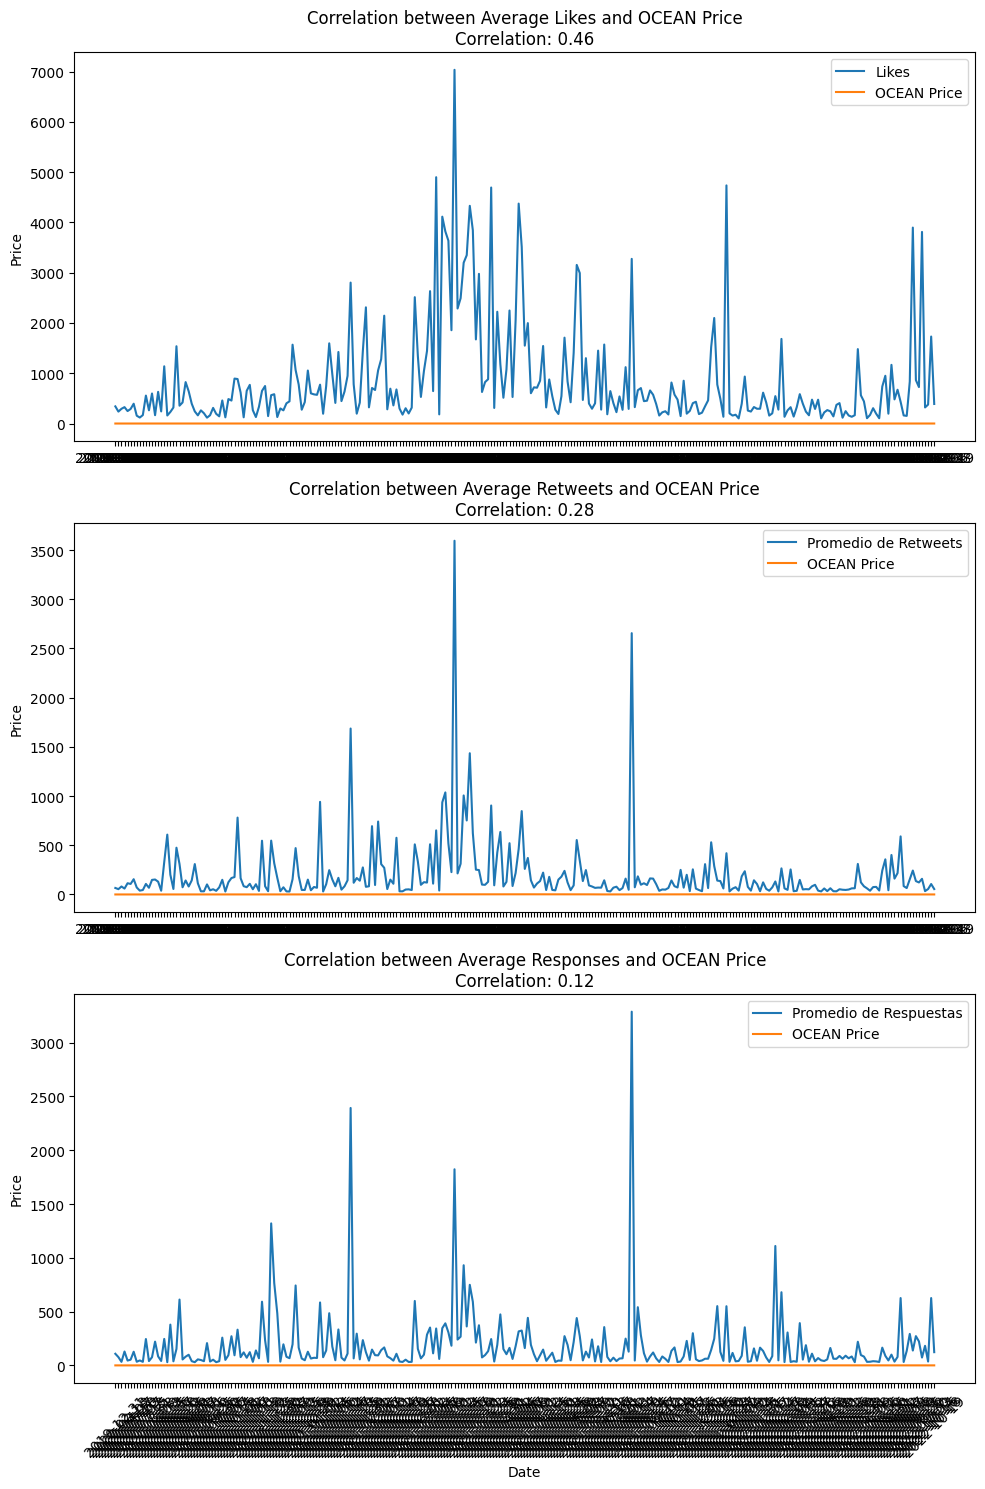

In [11]:
# Filter tweets with more than 100 likes, 30 retweets and 30 replies
filtered_tweets = ocean_tweets[(ocean_tweets['likes_count'] >= 100) & (ocean_tweets['retweets_count'] >= 30) & (ocean_tweets['replies_count'] >= 30)]

# Group filtered tweets by date and calculate average likes, retweets, and replies
grouped_tweets = filtered_tweets.groupby('date').agg({'likes_count': 'sum', 'retweets_count': 'sum', 'replies_count': 'sum'}).reset_index()

# Merge DataFrames based on "Date" column
merged_df = pd.merge(grouped_tweets, ocean_prices, left_on='date', right_on="Date")

# Calculate the correlation between the average number of likes, retweets, replies and the "Close" value of the cryptocurrency
correlation_likes = merged_df['likes_count'].corr(merged_df['Close'])
correlation_retweets = merged_df['retweets_count'].corr(merged_df['Close'])
correlation_replies = merged_df['replies_count'].corr(merged_df['Close'])

# Create the correlation plots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

axes[0].plot(merged_df['Date'], merged_df['likes_count'], label='Likes')
axes[0].plot(merged_df['Date'], merged_df['Close'], label='OCEAN Price')
axes[0].set_ylabel('Price')
axes[0].set_title(f'Correlation between Average Likes and OCEAN Price\nCorrelation: {correlation_likes:.2f}')
axes[0].legend()

axes[1].plot(merged_df['Date'], merged_df['retweets_count'], label='Promedio de Retweets')
axes[1].plot(merged_df['Date'], merged_df['Close'], label='OCEAN Price')
axes[1].set_ylabel('Price')
axes[1].set_title(f'Correlation between Average Retweets and OCEAN Price\nCorrelation: {correlation_retweets:.2f}')
axes[1].legend()

axes[2].plot(merged_df['Date'], merged_df['replies_count'], label='Promedio de Respuestas')
axes[2].plot(merged_df['Date'], merged_df['Close'], label='OCEAN Price')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Price')
axes[2].set_title(f'Correlation between Average Responses and OCEAN Price\nCorrelation: {correlation_replies:.2f}')
axes[2].legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

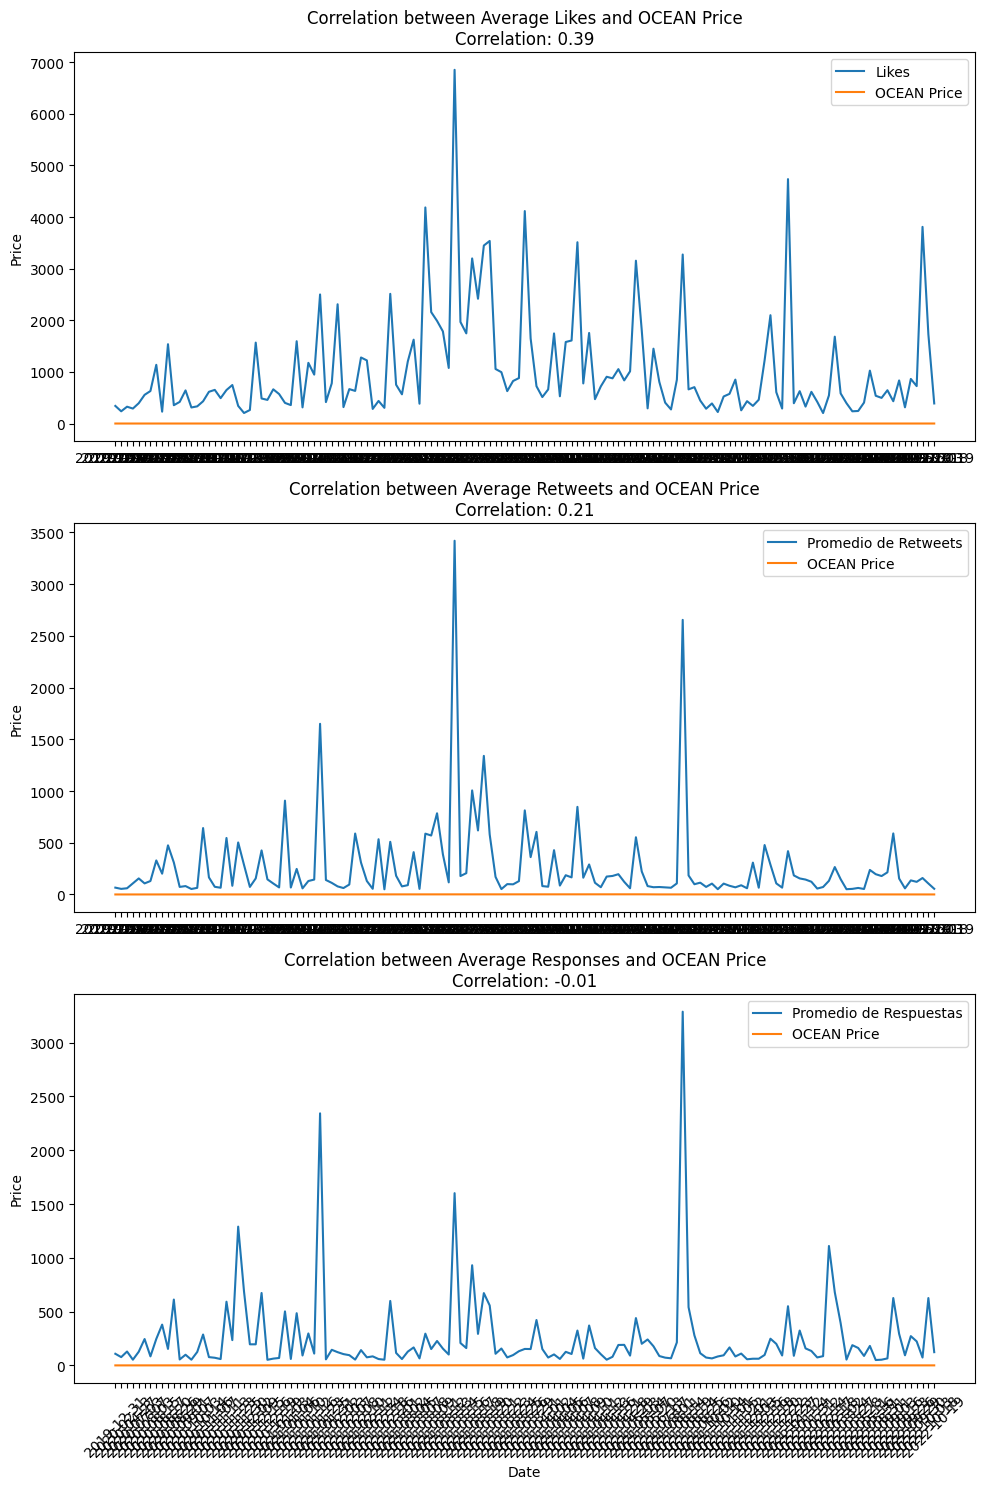

In [13]:
# Filter tweets with more than 200 likes, 50 retweets and 50 replies
filtered_tweets = ocean_tweets[(ocean_tweets['likes_count'] >= 200) & (ocean_tweets['retweets_count'] >= 50) & (ocean_tweets['replies_count'] >= 50)]


# Group filtered tweets by date and calculate average likes, retweets, and replies
grouped_tweets = filtered_tweets.groupby('date').agg({'likes_count': 'sum', 'retweets_count': 'sum', 'replies_count': 'sum'}).reset_index()

# Merge DataFrames based on "Date" column
merged_df = pd.merge(grouped_tweets, ocean_prices, left_on='date', right_on="Date")

# Calculate the correlation between the average number of likes, retweets, replies and the "Close" value of the cryptocurrency
correlation_likes = merged_df['likes_count'].corr(merged_df['Close'])
correlation_retweets = merged_df['retweets_count'].corr(merged_df['Close'])
correlation_replies = merged_df['replies_count'].corr(merged_df['Close'])

# Create the correlation plots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

axes[0].plot(merged_df['Date'], merged_df['likes_count'], label='Likes')
axes[0].plot(merged_df['Date'], merged_df['Close'], label='OCEAN Price')
axes[0].set_ylabel('Price')
axes[0].set_title(f'Correlation between Average Likes and OCEAN Price\nCorrelation: {correlation_likes:.2f}')
axes[0].legend()

axes[1].plot(merged_df['Date'], merged_df['retweets_count'], label='Promedio de Retweets')
axes[1].plot(merged_df['Date'], merged_df['Close'], label='OCEAN Price')
axes[1].set_ylabel('Price')
axes[1].set_title(f'Correlation between Average Retweets and OCEAN Price\nCorrelation: {correlation_retweets:.2f}')
axes[1].legend()

axes[2].plot(merged_df['Date'], merged_df['replies_count'], label='Promedio de Respuestas')
axes[2].plot(merged_df['Date'], merged_df['Close'], label='OCEAN Price')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Price')
axes[2].set_title(f'Correlation between Average Responses and OCEAN Price\nCorrelation: {correlation_replies:.2f}')
axes[2].legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

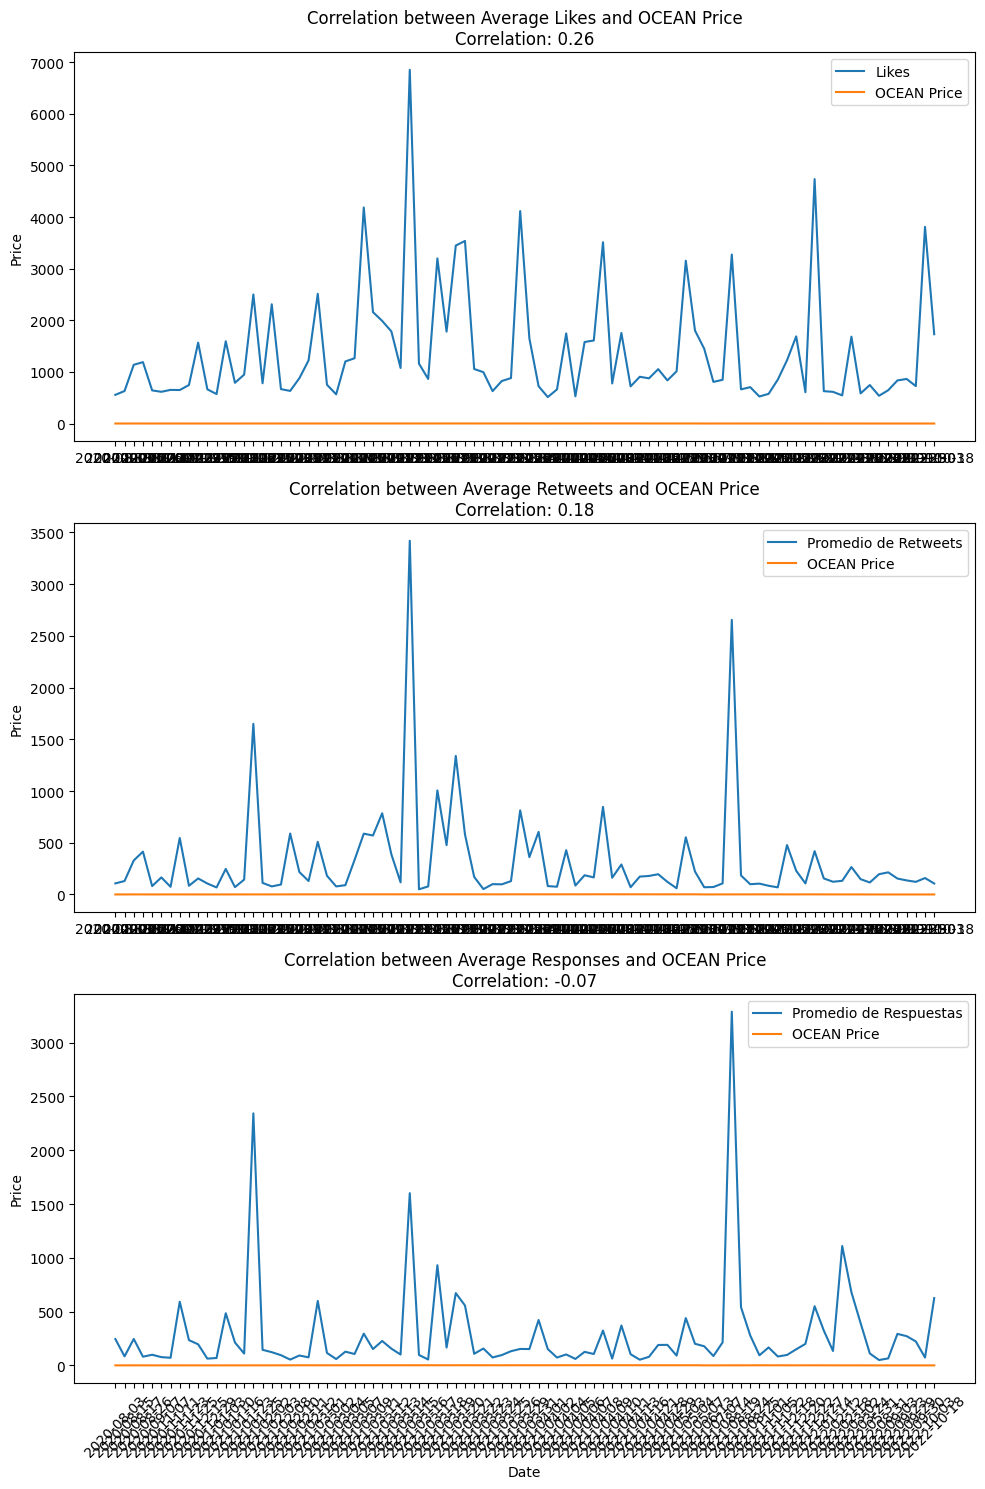

In [14]:
# Filter tweets with more than 500 likes, 50 retweets and 50 replies
filtered_tweets = ocean_tweets[(ocean_tweets['likes_count'] >= 500) & (ocean_tweets['retweets_count'] >= 50) & (ocean_tweets['replies_count'] >= 50)]

# Group filtered tweets by date and calculate average likes, retweets, and replies
grouped_tweets = filtered_tweets.groupby('date').agg({'likes_count': 'sum', 'retweets_count': 'sum', 'replies_count': 'sum'}).reset_index()

# Merge DataFrames based on "Date" column
merged_df = pd.merge(grouped_tweets, ocean_prices, left_on='date', right_on="Date")

# Calculate the correlation between the average number of likes, retweets, replies and the "Close" value of the cryptocurrency
correlation_likes = merged_df['likes_count'].corr(merged_df['Close'])
correlation_retweets = merged_df['retweets_count'].corr(merged_df['Close'])
correlation_replies = merged_df['replies_count'].corr(merged_df['Close'])

# Create the correlation plots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

axes[0].plot(merged_df['Date'], merged_df['likes_count'], label='Likes')
axes[0].plot(merged_df['Date'], merged_df['Close'], label='OCEAN Price')
axes[0].set_ylabel('Price')
axes[0].set_title(f'Correlation between Average Likes and OCEAN Price\nCorrelation: {correlation_likes:.2f}')
axes[0].legend()

axes[1].plot(merged_df['Date'], merged_df['retweets_count'], label='Promedio de Retweets')
axes[1].plot(merged_df['Date'], merged_df['Close'], label='OCEAN Price')
axes[1].set_ylabel('Price')
axes[1].set_title(f'Correlation between Average Retweets and OCEAN Price\nCorrelation: {correlation_retweets:.2f}')
axes[1].legend()

axes[2].plot(merged_df['Date'], merged_df['replies_count'], label='Promedio de Respuestas')
axes[2].plot(merged_df['Date'], merged_df['Close'], label='OCEAN Price')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Price')
axes[2].set_title(f'Correlation between Average Responses and OCEAN Price\nCorrelation: {correlation_replies:.2f}')
axes[2].legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

As can be seen in all the charts and data, it can be confirmed that the number of responses does not have a strong correlation with the price of OCEAN.
Additionally, it can be seen that the greatest correlation occurs between the likes of these tweets with the greatest "influence" and the price of OCEAN, even greater than the relationship with retweets.
But it is also seen that with tweets with more than 500 likes, the correlation decreases, which in a non-empirical conclusion could be due to the effect of twitter profiles that are bots or that introduce something more striking in their texts to obtain likes (such as adding different hashtag, saying that the price of OCEAN will grow 1000x in a few months, etc.)

# Model 1: Develop a machine learning model capable of classifying tweets as bullish, bearish, or neutral. You have the freedom to use any dataset for this task.


To verify the intention (bullish, bearish, or neutral) of each tweet, we will use a dataset previously tagged with tweets with financial markets, and their corresponding tag.

The dataset is called [zeroshot/twitter-financial-news-sentiment](https://huggingface.co/datasets/zeroshot/twitter-financial-news-sentiment) and is available on **HuggingFace**.
In this data, the label field is 0 for Bearish, 1 for Bullish and 2 for Neutral.

In [15]:
# We installed the library to download datasets from HuggingFace.
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 13.2 MB/s eta 0:00:00


In [16]:
# We import the library and the dataset
from datasets import load_dataset


In [17]:
twitter_financial_news_sentiment  = load_dataset('zeroshot/twitter-financial-news-sentiment', split='train')

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/zeroshot___csv/zeroshot--twitter-financial-news-sentiment-ccca0f3c622c5b67/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1. Subsequent calls will reuse this data.


In [18]:
# We convert the dataset to dataframe format
twitter_financial_news_sentiment_df = twitter_financial_news_sentiment.to_pandas()

We will create a **Random Forest classification** model, because after several tests we found that it generates better performance (by doing a manual comparison).

In [29]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier


# Split the training DataFrame (twitter-financial-news-sentiment) in features (X) and tags (y)
X_train = twitter_financial_news_sentiment_df['text']
y_train = twitter_financial_news_sentiment_df['label']

# Create the TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# We transform the training texts into numerical features using TF-IDF
X_train = vectorizer.fit_transform(X_train)

# We created the Random Forest classification model
model = RandomForestClassifier()

# train the model
model.fit(X_train, y_train)

# Preprocess OCEAN tweets
X_test = ocean_tweets['tweet']
X_test = vectorizer.transform(X_test)

# Make predictions on OCEAN tweets
predictions = model.predict(X_test)

# Add the predictions to the OCEAN Tweet DataFrame
ocean_tweets['label_prediction'] = predictions

In [30]:
# Imprimir el DataFrame con las predicciones
print(ocean_tweets[['tweet', 'label_prediction']])

                                                    tweet  label_prediction
0       @JakeGagain Get an $OCEAN bag, no matter how s...                 2
1       Great! Let's go #datascientists💪  Do you have ...                 2
2       "The Energy Efficiency Data challenge is desig...                 2
3       @CryptoGemsCom I have been buying $OCEAN, $BNB...                 2
4       @cryptoworld202 $OCEAN, $LTC, $NGM and $DAFI a...                 2
...                                                   ...               ...
229852  @Pentoshiswallet Solid picks... I’d replace $x...                 2
229853    @DaveCryptos $Sharering, $ocean, Blocktrade lol                 2
229854  There's a good chance that $INS is going to pu...                 2
229855  $OCEAN here with 3RV Chart Pattern  https://t....                 2
229856  @oyepana2 @bakeobits Welcome to $OCEAN.  Where...                 1

[229857 rows x 2 columns]


In [37]:
count_bearish = ocean_tweets['label_prediction'].value_counts()[0]
count_bullish = ocean_tweets['label_prediction'].value_counts()[1]
count_neutral = ocean_tweets['label_prediction'].value_counts()[2]

In [38]:
print(f"The number of neutral tweets is {count_neutral}, while bullish are {count_bullish} tweets and bearish {count_bearish} tweets.")

The number of neutral tweets is 222743, while bullish are 6900 tweets and bearish 214 tweets.


**As you can see, most of them are marked as neutral tweets, both because the training does not consider the language in the world of cryptocurrencies (it changes some things in relation to the rest of the financial world), but still you can manually verify that many are labeled correctly.**